# Tutorial Brief

IPython notebook provides a variety of web widgets that can interact with python code running the the background kernel.



# Why do we use widgets?

> ##IPython includes an architecture for interactive widgets that tie together Python code running in the kernel and JavaScript/HTML/CSS running in the browser. These widgets enable users to explore their code and data interactively.
> *http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Interactive%20Widgets/Index.ipynb*

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display



https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f',
)
range_slider


FloatRangeSlider(value=(-1.0, 1.0), description='xlim:', max=5.0, min=-5.0, readout_format='.1f')

## Build-it Widgets

In [4]:

tab1_children = [widgets.Button(description="Button"),
                 widgets.Checkbox(description="Checkbox"),
                 widgets.Dropdown(values=[1, 2], description="Dropdown"),
                 widgets.RadioButtons(values=[1, 2], description="RadioButtons"),
                 widgets.Select(values=[1, 2], description="Select"),
                 widgets.Text(description="Text"),
                 widgets.Textarea(description="Textarea"),
                 widgets.ToggleButton(description="ToggleButton"),
                 widgets.ToggleButtons(values=["Value 1", "Value2"], description="ToggleButtons"),
                 ]

tab2_children = [widgets.BoundedFloatText(description="BoundedFloatText"),
                 widgets.BoundedIntText(description="BoundedIntText"),
                 widgets.FloatSlider(description="FloatSlider"),
                 widgets.FloatText(description="FloatText"),
                 widgets.IntSlider(description="IntSlider"),
                 widgets.IntText(description="IntText"),
                 ]





tab1 = widgets.VBox(children=tab1_children)
tab2 = widgets.VBox(children=tab2_children)

i = widgets.Accordion(children=[tab1,tab2])

i.set_title(0, 'plot')
i.set_title(1, 'styling')

display(i)



Accordion(children=(VBox(children=(Button(description='Button', style=ButtonStyle()), Checkbox(value=False, de…

# Simple Example

We will define a function that print the factorial.

$f(x) = x!$

$f(x) = x \times (x-1) \times ... 1$

$f(3) = 3! = 3 \times 2 \times 1 = 6$

In [5]:
def factorial(x):
    print ("%s!= %s" % (x,np.math.factorial(x)))

def factorial2(x):
    if type(x) == int:
        if x >= 0:
            print (np.prod(np.arange(1,x+1)))
        else:
            print ("ERROR: Number must be positive")
    else:
        print ("ERROR: Only interger is allowed")

Now we will test it using a code cell

In [6]:
factorial(3)

3!= 6


# Using interact function

We will link that to a slider to make the x a variable that we can control.

In [7]:
i = interact(factorial, x=(0,100))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

## Controlling a Chart

In [8]:
#This function plot x, y and adds a title
def plt_arrays(x, y, title="", color="red", linestyle="dashed", linewidth=2):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(x,y, color=color, linestyle=linestyle, linewidth=linewidth)
    axes.set_title(title)
    axes.grid()
    plt.show()

We will define a function that return the following:

$f(x) = ax^3 + bx^2 + cx + d$

where a,b,c and d are are constants.

In [9]:
def f(a, b, c, d, **kwargs):
    x=np.linspace(-10, 10, 20)
    y = a*(x**3) + b*(x**2) + c*x + d
    
    title="$f(x) = (%s)x^{3} + (%s)x^{2} + (%s)x + (%s)$" % (a,b,c,d)
    
    plt_arrays(x,y, title=title, **kwargs)

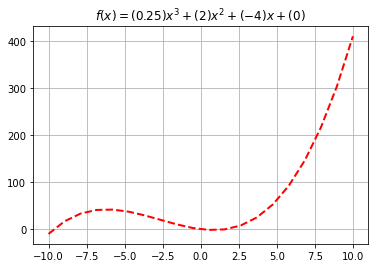

In [10]:
#Define Constants
a=0.25
b=2
c=-4
d=0

f(a, b, c, d)

In [11]:
i = interact(f,
             a=(-10.,10),
             b=(-10.,10),
             c=(-10.,10),
             d=(-10.,10),
             color = ["red", "blue", "green"],
             linestyle=["solid", "dashed"],
             linewidth=(1,8)
             )

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

## Displaying a widget from interact function

In [12]:
i.widget

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0), FloatSlider(value=0.0, des…